## Proyek Analisis Data = Bike-Sharing Dataset

 Nama : Yovela Kalista Avansa 
 
 Email : yovelakalista23@gmail.com

## Menentukan Pertanyaan Analisis
  1. Pada jam berapa penggunaan sepeda paling tinggi?
  2. Apakah ada perbedaan penggunaan sepeda di tahun yang berbeda?
  3. Apakah tren penggunaan berbeda berdasarkan musim?
  4. Berapa proporsi pengguna terdaftar dibandingkan dengan pengguna kasual?
  5. Bagaimana pola penggunaan pengguna kasual dan terdaftar berdasarkan musim atau cuaca?



## Menyiapkan Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

# Data Wrangling
## Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/yovelakalista23/bike-sharing/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/yovelakalista23/bike-sharing/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data
 Menilai day_df

In [4]:
# information of day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
#check missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# check for duplicate
print("Number of Duplicates: ", day_df.duplicated().sum())
print("Sample Size:", len(day_df))


Number of Duplicates:  0
Sample Size: 731


Menilai hour_df

In [8]:
# information of hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
# check for missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# check for duplicate
print("Number of Duplicates: ", hour_df.duplicated().sum())
print("Sample Size:", len(hour_df))

Number of Duplicates:  0
Sample Size: 17379


## EDA(Exploratory Data Analyst)

In [12]:
dday = day_df.groupby("dteday")["cnt"].mean().reset_index()
print(dday)

         dteday     cnt
0    2011-01-01   985.0
1    2011-01-02   801.0
2    2011-01-03  1349.0
3    2011-01-04  1562.0
4    2011-01-05  1600.0
..          ...     ...
726  2012-12-27  2114.0
727  2012-12-28  3095.0
728  2012-12-29  1341.0
729  2012-12-30  1796.0
730  2012-12-31  2729.0

[731 rows x 2 columns]


In [13]:
dhour = hour_df.groupby("hr")["cnt"].mean().round().reset_index()
print(dhour)

    hr    cnt
0    0   54.0
1    1   33.0
2    2   23.0
3    3   12.0
4    4    6.0
5    5   20.0
6    6   76.0
7    7  212.0
8    8  359.0
9    9  219.0
10  10  174.0
11  11  208.0
12  12  253.0
13  13  254.0
14  14  241.0
15  15  251.0
16  16  312.0
17  17  461.0
18  18  426.0
19  19  312.0
20  20  226.0
21  21  172.0
22  22  131.0
23  23   88.0


In [14]:
workday = day_df.groupby("workingday")["cnt"].mean().reset_index()
workday.columns = ["workingday", "avg_cnt"]

holiday = day_df.groupby("holiday")["cnt"].mean().reset_index()
holiday.columns = ["holiday", "avg_cnt"]
print("Rata-rata penggunaan sepeda pada hari kerja vs hari libur (workingday):")
print(workday)

print("\nRata-rata penggunaan sepeda pada hari libur vs hari biasa (holiday):")
print(holiday)

# 1 = hari kerja, 0= hari libur

Rata-rata penggunaan sepeda pada hari kerja vs hari libur (workingday):
   workingday      avg_cnt
0           0  4330.168831
1           1  4584.820000

Rata-rata penggunaan sepeda pada hari libur vs hari biasa (holiday):
   holiday      avg_cnt
0        0  4527.104225
1        1  3735.000000


In [44]:
season = day_df.groupby("season")["cnt"].mean().round().reset_index()
season.columns = ["season", "avg_cnt"]

# Output hasil
print("Rata-rata penggunaan sepeda berdasarkan musim:")
print(season)


Rata-rata penggunaan sepeda berdasarkan musim:
   season  avg_cnt
0       1   2604.0
1       2   4992.0
2       3   5644.0
3       4   4728.0


In [16]:
# Total jumlah pengguna berdasarkan kategori
total_registered = day_df["registered"].sum()
total_casual = day_df["casual"].sum()

# Hitung proporsi
total_users = total_registered + total_casual
registered_prop = (total_registered / total_users) * 100
casual_prop = (total_casual / total_users) * 100

print(f"Total pengguna terdaftar (registered): {total_registered}")
print(f"Total pengguna kasual (casual): {total_casual}")
print(f"Proporsi pengguna terdaftar: {registered_prop:.2f}%")
print(f"Proporsi pengguna kasual: {casual_prop:.2f}%")

Total pengguna terdaftar (registered): 2672662
Total pengguna kasual (casual): 620017
Proporsi pengguna terdaftar: 81.17%
Proporsi pengguna kasual: 18.83%


In [17]:
# Kelompokkan data berdasarkan jam dan hitung total pengguna
hourly_usage = hour_df.groupby("hr")["cnt"].sum().reset_index()

# Cari jam dengan penggunaan tertinggi
peak_hour = hourly_usage.loc[hourly_usage["cnt"].idxmax()]

print("Jam dengan penggunaan sepeda paling tinggi:")
print(f"Jam: {peak_hour['hr']} dengan total pengguna: {peak_hour['cnt']}")

Jam dengan penggunaan sepeda paling tinggi:
Jam: 17 dengan total pengguna: 336860


In [18]:
# Kelompokkan data berdasarkan kolom 'yr' dan hitung rata-rata jumlah pengguna
yearly = day_df.groupby("yr")["cnt"].mean().reset_index()
yearly.columns = ["yr", "avg_cnt"]

print("Rata-rata penggunaan sepeda di tahun yang berbeda:")
print(yearly)

Rata-rata penggunaan sepeda di tahun yang berbeda:
   yr      avg_cnt
0   0  3405.761644
1   1  5599.934426


In [19]:
# Kelompokkan data berdasarkan musim dan hitung rata-rata jumlah pengguna
season_usage = day_df.groupby("season")[["casual", "registered"]].mean().reset_index()
season_usage.columns = ["season", "avg_casual", "avg_registered"]

print("Rata-rata penggunaan pengguna kasual dan terdaftar berdasarkan musim:")
print(season_usage)

Rata-rata penggunaan pengguna kasual dan terdaftar berdasarkan musim:
   season   avg_casual  avg_registered
0       1   334.928177     2269.204420
1       2  1106.097826     3886.233696
2       3  1202.611702     4441.691489
3       4   729.112360     3999.050562


In [30]:
# Gabungkan rata-rata penggunaan sepeda berdasarkan musim dengan rata-rata penggunaan kasual dan terdaftar
merged_season_df = pd.merge(season, season_usage, on="season", how="outer")
merged_season_df.head()

,season,avg_cnt,avg_casual,avg_registered
0,1,2604.0,334.928177,2269.204420
1,2,4992.0,1106.097826,3886.233696
2,3,5644.0,1202.611702,4441.691489
3,4,4728.0,729.112360,3999.050562


In [32]:
# Buat DataFrame untuk proporsi pengguna
prop_df = pd.DataFrame({
    "category": ["registered", "casual"],
    "total": [total_registered, total_casual],
    "proportion": [registered_prop, casual_prop]
})
prop_df.head()

,category,total,proportion
0,registered,2672662,81.169832
1,casual,620017,18.830168


## Data Visualization & Explanatory

1. Pada jam berapa penggunaan sepeda paling tinggi?

C:\Users\DELL\AppData\Local\Temp\ipykernel_13132\1019721050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_usage["hr"], y=hourly_usage["cnt"], palette="viridis", hue=None)


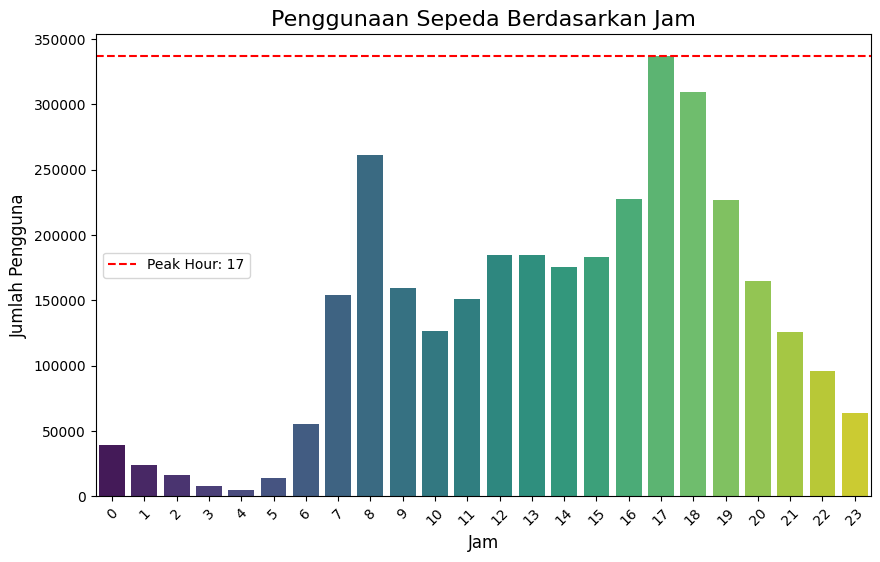

In [25]:
# Visualisasi bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_usage["hr"], y=hourly_usage["cnt"], palette="viridis", hue=None)
plt.title("Penggunaan Sepeda Berdasarkan Jam", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=peak_hour["cnt"], color="red", linestyle="--", label=f"Peak Hour: {peak_hour['hr']}")
plt.legend()
plt.show()

2. Apakah ada perbedaan penggunaan sepeda di tahun yang berbeda?

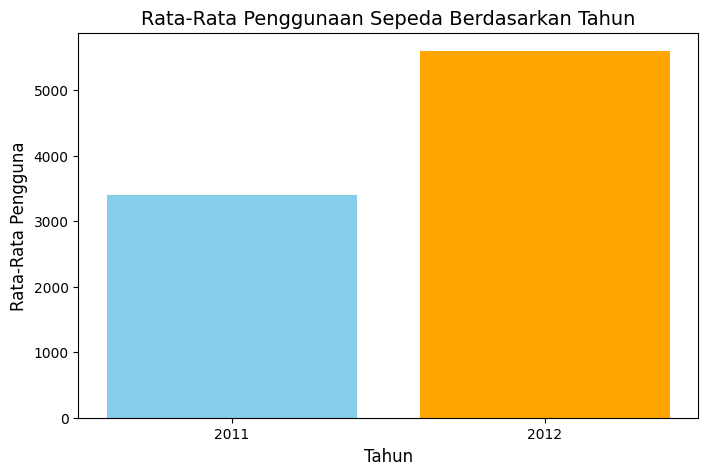

In [26]:
# Visualisasi bar chart
plt.figure(figsize=(8, 5))
plt.bar(yearly["yr"].astype(str), yearly["avg_cnt"], color=["skyblue", "orange"])
plt.title("Rata-Rata Penggunaan Sepeda Berdasarkan Tahun", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Rata-Rata Pengguna", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["2011", "2012"], fontsize=10)
plt.show()

3. Apakah tren penggunaan berbeda berdasarkan musim?

C:\Users\DELL\AppData\Local\Temp\ipykernel_13132\2744706988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="avg_cnt", data=season, palette=["skyblue", "pink", "yellow", "orange"])


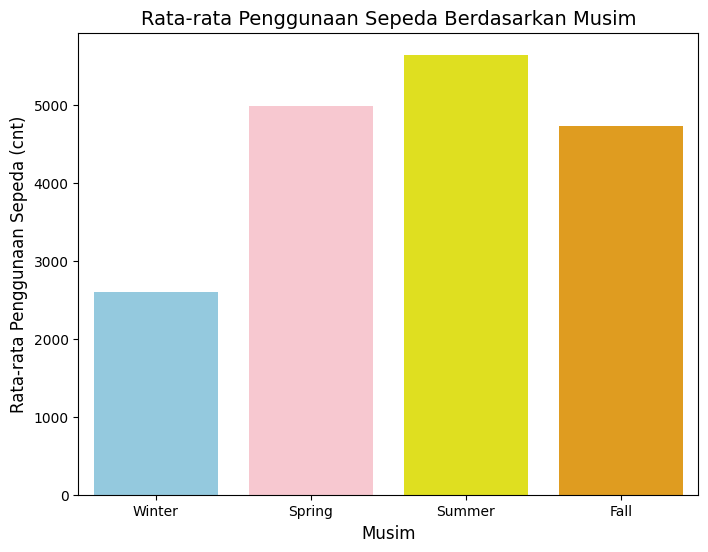

In [27]:
# Visualisasi rata-rata penggunaan sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
sns.barplot(x="season", y="avg_cnt", data=season, palette=["skyblue", "pink", "yellow", "orange"])
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Penggunaan Sepeda (cnt)", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Winter", "Spring", "Summer", "Fall"], fontsize=10)
plt.show()

4. Berapa proporsi pengguna terdaftar dibandingkan dengan pengguna kasual?

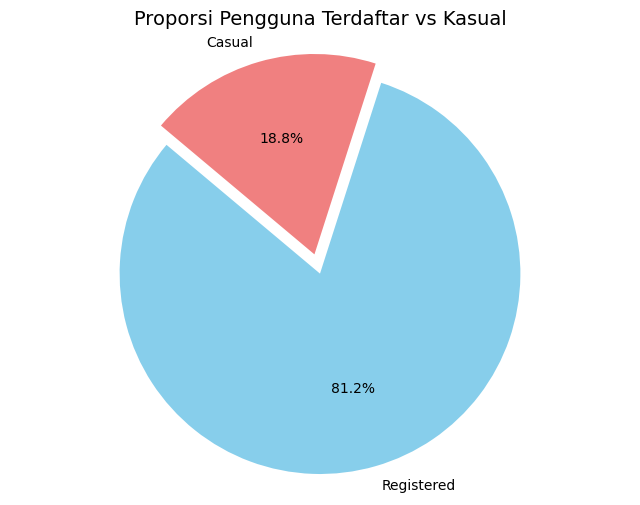

In [28]:
# Data untuk pie chart
labels = ['Registered', 'Casual']
sizes = [registered_prop, casual_prop]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Membuat potongan untuk highlight

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Pengguna Terdaftar vs Kasual', fontsize=14)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

5. Bagaimana pola penggunaan pengguna kasual dan terdaftar berdasarkan musim atau cuaca?

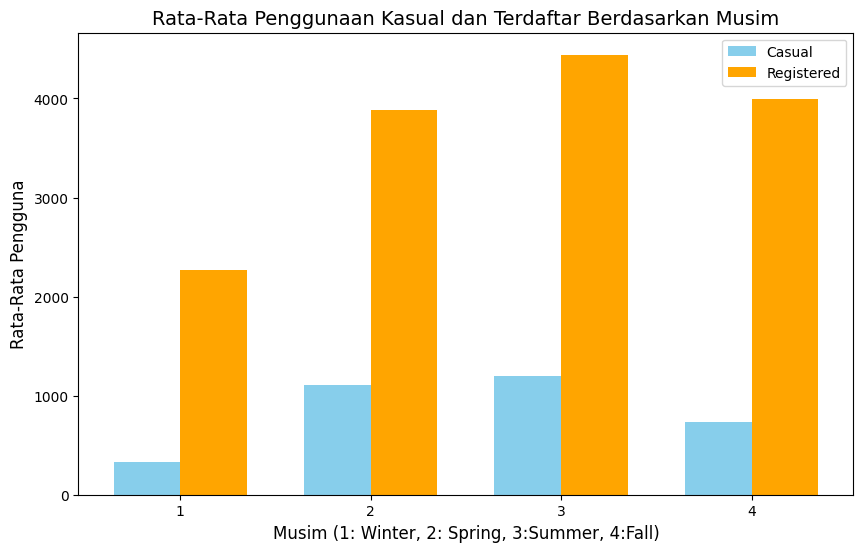

In [46]:
# Data untuk visualisasi
x = np.arange(len(season_usage["season"]))
width = 0.35

# Visualisasi bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, season_usage["avg_casual"], width, label="Casual", color="skyblue")
plt.bar(x + width/2, season_usage["avg_registered"], width, label="Registered", color="orange")

# Tambahkan label
plt.title("Rata-Rata Penggunaan Kasual dan Terdaftar Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim (1: Winter, 2: Spring, 3:Summer, 4:Fall)", fontsize=12)
plt.ylabel("Rata-Rata Pengguna", fontsize=12)
plt.xticks(x, season_usage["season"])
plt.legend()
plt.show()